<a href="https://colab.research.google.com/github/Felecort/TF-Rush/blob/master/src/10_2_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%tensorflow_version 2.x
from tensorflow import keras
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__


'2.8.2'

# Encoder structure

In [13]:
enc_input = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu")(enc_input)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Flatten()(x)
enc_output = layers.Dense(8, activation="linear")(x)


In [14]:
encoder = keras.Model(enc_input, enc_output, name="encoder")


# Decoder structure

In [15]:
dec_input = keras.Input(shape=(8, ), name="encoded_img")
x = layers.Dense(7 * 7 * 8, activation="relu")(dec_input)
x = keras.layers.Reshape((7, 7, 8))(x)
x = layers.Conv2DTranspose(64, 5, strides=(2, 2), activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(32, 5, strides=(2, 2), activation="linear", padding="same")(x)
x = layers.BatchNormalization()(x)
dec_output = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)


In [16]:
decoder = keras.Model(dec_input, dec_output, name="decoder")


# Load data

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Create model

In [18]:
autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = encoder(autoencoder_input)
autoencoder_output = decoder(x)

autoencodet = keras.Model(autoencoder_input,  autoencoder_output, name="autoenoder")


# Train model

In [19]:
autoencodet.compile(optimizer="adam",
                    loss="categorical_crossentropy",
                    metrics="accuracy")

In [20]:
autoencodet.fit(x_train, x_train, batch_size=32, epochs=1)


1875/1875 [==============================] - 9s 5ms/step - loss: 8.6214 - accuracy: 0.6503


In [21]:
h = encoder.predict(tf.expand_dims(x_test[0], axis=0))
img = decoder.predict(h)


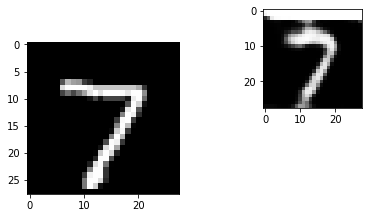

In [24]:
plt.subplot(121)
plt.imshow(x_test[0], cmap="gray")
plt.subplot(233)
plt.imshow(img.squeeze(), cmap="gray")
